In [27]:
import os
import csv
import matplotlib.pyplot as plt

0

In [48]:
def findDuration(printTrace):
    mesure = 1
    with open("profile", newline="") as csvfile:
        reader = csv.reader(csvfile, delimiter=",")
        tempsTotal = 0
        i = 0
        for row in reader:
            if (i == 4):
                if (row[1] == "ms"):
                    mesure = 1000
            if (i >= 5):
                tempsTotal += float(row[1]) * mesure
                if (printTrace):
                    print(row[1], "->", row[18])
            i += 1
        return tempsTotal


In [60]:
os.system("nvcc main.cu histogramGPU.cu histogramCPU.cpp utils/chronoCPU.cpp utils/chronoGPU.cu utils/image.cpp -O3 -o main")
os.system("nvprof --csv --print-gpu-trace --log-file profile ./main -N 4 -b 128")
findDuration(True)

62.815000 -> [CUDA memcpy HtoD]
127.421000 -> rgb2hsv(unsigned char*, int, float*, float*, int*)
65.727000 -> histogramShared(int*, int*, int, unsigned int)
24.543000 -> repart(int*, int*)
3.232000 -> [CUDA memcpy DtoD]
46.655000 -> equalizationConstant(int*, float*, int)
69.758000 -> hsv2rgb(unsigned char*, int, float*, float*, float*)
61.982000 -> [CUDA memcpy DtoH]
81.822000 -> [CUDA memcpy DtoH]


543.955

In [37]:
with open("profile", newline="") as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    i = 0
    tempsTotal = 0 
    for row in reader:
        if (i >= 5):
            tempsTotal += float(row[1])
            print(row[1], "->", row[18])
        i += 1
    print("Temps total", tempsTotal)

Temps total 0


[551.19, 557.5550000000001, 549.6200000000001, 561.718, 572.7239999999999, 594.7410000000001, 584.37, 585.206]


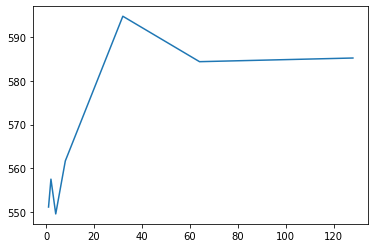

In [54]:
N = [1,2,4,8,16,32,64,128]
durations = []
for n in N:
    os.system("nvprof --csv --print-gpu-trace --log-file profile ./main -N " + str(n) + " -b 128")
    durations.append(findDuration(False))
print(durations)
plt.plot(N,durations)
plt.show()

#Meilleure valeur N = 4

[1237.577, 770.543, 591.1550000000001, 550.837, 552.4390000000001, 572.31, 591.764]


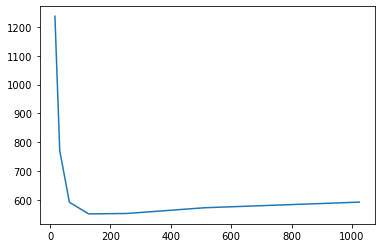

In [53]:
B = [16,32,64,128, 256, 512, 1024]
durations = []
for b in B:
    os.system("nvprof --csv --print-gpu-trace --log-file profile ./main -N 4 -b " + str(b)) # On utilise -N avec 4 car ce sont les meilleurs résultats
    durations.append(findDuration(False))
print(durations)
plt.plot(B,durations)
plt.show()
#Meilleure valeur b = 128